In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
'''Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a popular clustering algorithm in machine learning
used for grouping together points that are closely packed together in a high-dimensional space. Unlike k-means, 
which requires specifying the number of clusters beforehand, DBSCAN does not require the user to specify the number of clusters.
Instead, it uses two parameters:
1. Epsilon (eps): This parameter defines the radius within which to search for neighboring points.
It essentially determines the distance threshold between points to consider them as part of the same cluster.

2. Minimum samples (min_samples): This parameter specifies the minimum number of points required to form a dense region (core point). 
If there are at least min_samples points within the eps radius of a point, then that point is considered a core point.'''


'Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a popular clustering algorithm in machine learning\nused for grouping together points that are closely packed together in a high-dimensional space. Unlike k-means, \nwhich requires specifying the number of clusters beforehand, DBSCAN does not require the user to specify the number of clusters.\nInstead, it uses two parameters:\n1. Epsilon (eps): This parameter defines the radius within which to search for neighboring points.\nIt essentially determines the distance threshold between points to consider them as part of the same cluster.\n\n2. Minimum samples (min_samples): This parameter specifies the minimum number of points required to form a dense region (core point). \nIf there are at least min_samples points within the eps radius of a point, then that point is considered a core point.'

In [88]:
# Load the data
data = pd.read_csv('Mall_Customers.csv')

In [89]:
# Select features for clustering (let's assume 'Annual Income (k$)' and 'Spending Score (1-100)')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [90]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
cluster_labels = dbscan.fit_predict(X_scaled)

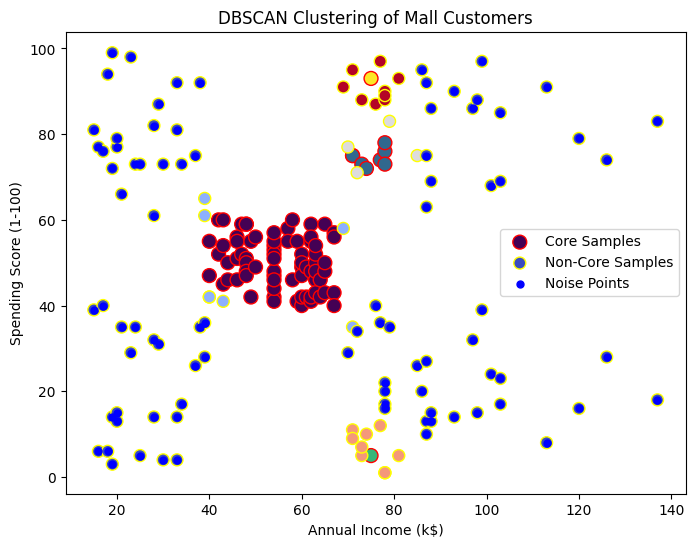

In [95]:
# Separate core samples, non-core samples, and noise points
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
#Can access the labels assigned by DBSCAN using the labels_ attribute.
labels = dbscan.labels_

# Plot the clusters
''' Core samples (large dots) and non-core samples (small dots) are color-coded according to the assigned cluster.
Samples tagged as noise are represented in blue.'''
plt.figure(figsize=(8, 6))

# Plot core samples
plt.scatter(X.iloc[core_samples_mask, 0], X.iloc[core_samples_mask, 1], c=labels[core_samples_mask], cmap='viridis', s=100, edgecolors='red', label='Core Samples')

# Plot non-core samples
plt.scatter(X.iloc[~core_samples_mask, 0], X.iloc[~core_samples_mask, 1], c=labels[~core_samples_mask], cmap='coolwarm', s=75, edgecolors='yellow', label='Non-Core Samples')

# Plot noise points
plt.scatter(X[labels == -1]['Annual Income (k$)'], X[labels == -1]['Spending Score (1-100)'], color='blue', s=25, label='Noise Points')

plt.title('DBSCAN Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [81]:
from mpl_toolkits.mplot3d import Axes3D  # Importing this module for 3D projection
# Load the data
data = pd.read_csv('Mall_Customers.csv')

In [82]:
# Let's assume you want to cluster based on 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)'
#DBScan for 3D data
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [83]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [84]:
# Applying DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=3)
cluster_labels = dbscan.fit_predict(X_scaled)

C:\Users\Prabakaran J\AppData\Local\Temp\ipykernel_31248\1944073466.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X.loc[cluster_labels == cluster_label, 'Age'],


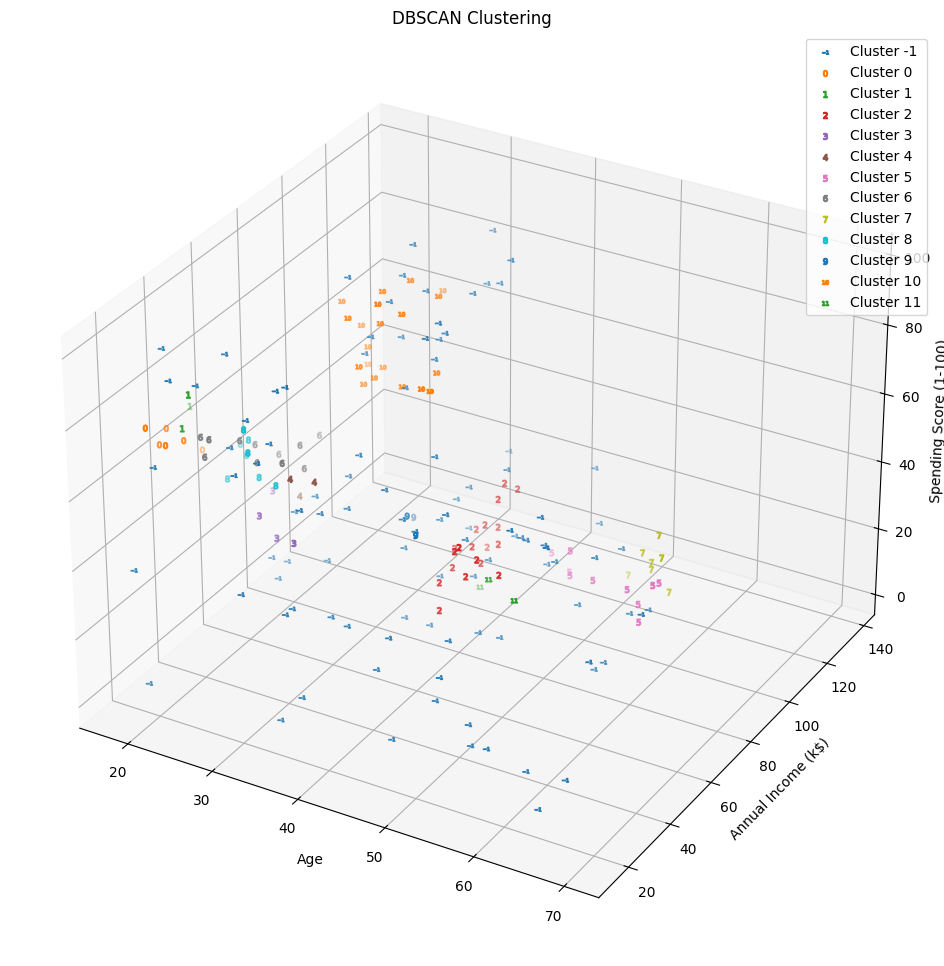

In [85]:
# Plotting the clusters in 3D
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')
'''add_subplot(111, projection='3d'): This function adds a subplot to the figure.
The arguments 111 are shorthand for creating a single subplot in a grid with 1 row and 1 column 
 Noisy samples are given the label math:-1.'''

# Plotting data points with cluster labels
for cluster_label in np.unique(cluster_labels):
    ax.scatter(X.loc[cluster_labels == cluster_label, 'Age'],
               X.loc[cluster_labels == cluster_label, 'Annual Income (k$)'],
               X.loc[cluster_labels == cluster_label, 'Spending Score (1-100)'],
               label=f'Cluster {cluster_label}', cmap='coolwarm',
               marker=f'${cluster_label}$')

# Labeling the axes
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('DBSCAN Clustering')
ax.legend()

plt.show()